# Vessels

## About

OIH is exploring how we might leverage schema.org to describe research vessels.  
Note that schema.org is a very broad vocabulary and as such specific concepts 
like research vessel is not well aligned to current types.

In Schema.org the type [Vehicle](https://schema.org/Vehicle) is described as a device that is designed 
or used to transport people or cargo over land, water, air, or through space.
We have used this broad scoping to cover research vessels.  We could go on to 
connect this type then to a descriptive property in a concept such as
the WikiData entry for [Research Vessel, Q391022](https://www.wikidata.org/wiki/Q391022).
We may also wish to leverage some of the approaches in [Keywords and Defined Terms](../terms/list.md).


Our goal is to use schema.org as a simple upper level vocabulary that allows
us to describe research vessels in a simple manner and then connect to more 
detailed information on them.  

So the goal here is to show how we can use schema.org as a discovery layer
and then link more directly to detailed institutional metadata records.  

This may also leverage the approaches similar to what is shown in 
the [Publishing Principles](../sdg/index.md) resources.

Observing Infrastructure in general represents an interesting challenge.  A
specified infrastructure could be referenced as a ResearchProject within Schema.org,
though other types would be explored.  One could also build off the base Thing class,
parent to all Schema.org types, then leverage the property schema.org/instrument, itself
of type Thing.  This approach provides an initial starting point to build out the
approach.

It should be noted that [schema.org/Observation](https://schema.org/Observation) also exists but can only
currently be used with the property [schema.org/diseaseSpreadStatistics](https://schema.org/diseaseSpreadStatistics).
However, if seen useful, there is the potential to connect Observation back to a
type of Infrastructure that does not currently exist in Schema.org but could be
proposed.

Addressing the challenge of Observation Infrastructure, and
potentially revisiting the current OIH type Vessel, may involve engagement with
Schema.org itself, something they encourage. 

```{literalinclude} ../../../odis-in/dataGraphs/thematics/vessels/graphs/ship.json
:linenos:
```

In [1]:
import json
from pyld import jsonld
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils


with open("../../../odis-in/dataGraphs/thematics/vessels/graphs/ship.json") as dgraph:
    doc = json.load(dgraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)

NameError: name 'split_uri' is not defined

### Details: Indentifier

For each profile there are a few key elements we need to know about.  One
key element is what the authoritative reference or canonical identifier is for 
a resource.

{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "https://example.org/permanentUrlToThisJsonDoc",
    "@type": "Vehicle",
    "identifier": {
        "@id": "https://example.org/id/vessel/X",
        "@type": "PropertyValue",
        "description": "Vessel ID ",
        "propertyID": "https://en.wikipedia.org/wiki/IMO_number",
        "url": "https://example.org/id/vessel/X"
    }
}


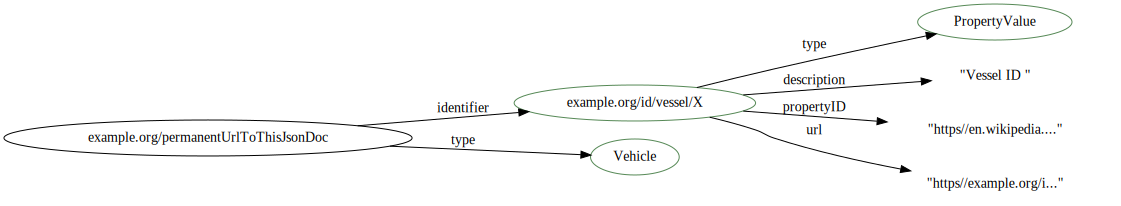

In [2]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("../../../odis-in/dataGraphs/thematics/vessels/graphs/ship.json") as dgraph:
    doc = json.load(dgraph)

frame = {
  "@context": {"@vocab": "https://schema.org/"},
  "@explicit": "true",
  "@requireAll": "true",
  "@type":     "Vehicle",
  "identifier": ""
}

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)
jd = json.dumps(framed, indent=4)
print(jd)

jbutils.show_graph(framed)

### Details: subjectOf

Like SOS, we are recommending the use of subjectOf to link a simple 
Schema.org type to a more detailed metadata description record.  This 
allows us to use the easy discovery layer in Schema.org but connect to 
domain specific metadata records.

{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "https://example.org/permanentUrlToThisJsonDoc",
    "@type": "Vehicle",
    "subjectOf": {
        "@type": "DataDownload",
        "dateModified": "2019-06-12T14:44:15Z",
        "description": "Metadata describing the vessel",
        "encodingFormat": [
            "application/xml",
            "https://foo.org/ship01"
        ],
        "name": "external-metadata.xml"
    }
}


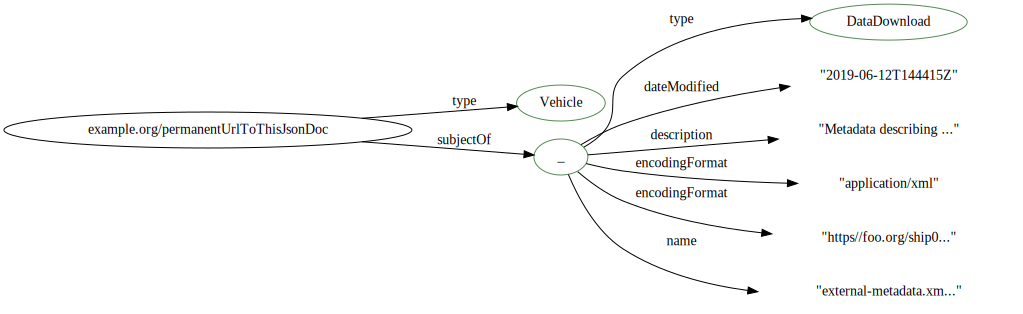

In [3]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("../../../odis-in/dataGraphs/thematics/vessels/graphs/ship.json") as dgraph:
    doc = json.load(dgraph)

frame = {
  "@context": {"@vocab": "https://schema.org/"},
  "@explicit": "true",
  "@requireAll": "true",
  "@type":     "Vehicle",
  "subjectOf": ""
}

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)
jd = json.dumps(framed, indent=4)
print(jd)

jbutils.show_graph(framed)

## References

* [ICES](https://vocab.ices.dk/?ref=315)
* POGO
* EurOcean
* https://vocab.nerc.ac.uk/search_nvs/C17/
* [SeaDataNet](https://www.seadatanet.org/)
* [Marine Facilities Planner](https://www.marinefacilitiesplanning.com/)
* [EuroFleets](https://www.eurofleets.eu/)
* Identifiers to use include NOCD Code, Call Sign, ICES Shipcode, MMSI Code, IMO Code